# 기말 발표 내용 

##  - 문제 소개 : 가장 많이 읽은 Category에 대한 나의 생각 및 관심사 확인하기

###  - 기획 의도 : 데이터 분석이라는 거창한 주제를 생활 속에서 시작하기.

In [55]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt # plot 관련
import matplotlib.font_manager # font 관련
import seaborn as sns # plot 관련
from wordcloud import WordCloud
from konlpy.tag import Twitter # 단어 처리
from sklearn.feature_extraction.text import CountVectorizer
import operator
%matplotlib inline
import networkx
matplotlib.style.use('ggplot')

In [40]:
def get_word(doc):
    '''길이가 2 이상인 단어 및 필요없는 단어 제거'''
    tagger = Twitter()
    nouns = tagger.nouns(doc)
    
    remove_noun = []
    with open('remove_noun.txt', 'r', newline='\r\n', encoding='utf8') as f:
        for line in f.readlines():
            remove_noun.append(line.strip())
            
    res = []
    for noun in nouns:
        if ((len(noun) > 1) & (noun not in remove_noun)) :
            res.append(noun)
    
    return res

In [5]:
book = pd.read_excel('book.xlsx', encoding = "utf-8") # 책 읽은 내역 데이터

In [6]:
book.head()

,Title,Subtitle,Author,Translator,Publisher,Publish Date,Format,Pages,ISBN,Status,...,Category,Started Reading,Finished Reading,Reading Period,Borrowed,Have Weekend,Reading Time,Read Reason,Found Route,Route Category
0,프레임,나를 바꾸는 심리학의 지혜,최인철,NaN,21세기북스,NaN,eBook,188,9788950911546,Read,...,자기계발,2015-12-30,2016-01-05,6,N,Y,0,지인추천,NaN,지인
1,왜 나는 범죄를 공부하는가,최고의 프로파일러 표창원 박사의 두려움 없는 공부,표창원,NaN,다산북스,2015-03-17 00:00:00,eBook,229,9791130604909,Read,...,자기계발,2016-01-05,2016-01-07,2,N,N,0,검색,정의의적들,TV프로그램
2,정의의 적들,"정의는 때로 천천히, 하지만 반드시 온다",표창원,NaN,한겨레출판,2014-05-19 00:00:00,eBook,312,8984318116,Read,...,사회학,2016-01-08,2016-01-11,3,N,Y,0,검색,정의의적들,TV프로그램
3,"로봇 시대,인간의 일",인공지능 시대를 살아가야 할 이들을 위한 안내서,구본권,NaN,어크로스,2015-12-15 00:00:00,Paperback,342,9788997379767,Read,...,인문일반,2016-01-12,2016-01-14,2,Y,N,0,지인추천,NaN,지인
4,숨겨진 심리학,NaN,표창원,NaN,토네이도,2011-04-11 00:00:00,book,226,9788994013343,Read,...,자기계발,2016-01-14,2016-01-18,4,Y,Y,0,검색,정의의적들,TV프로그램


###### 책읽은 내용 파일 목록 가져오기

In [10]:
content_list = []
for num in range(1,27):
    filename = 'content/'+str(num)+'.txt'
    with open(filename, 'r', encoding = 'utf-8') as f:
        text_content = f.read()
        content_list.append(text_content)

In [11]:
content_list

['건너뛰기 형태로 책을 읽은지 언 2년이 되가지만 이렇게 남기는건 처음이다. 기억도 잘안나서 써도 별내용이나 쓰려나 해서 안쓰려 했다. 그래도 남기는게 나중에 글쓰는데 도움된다고 해서 적어본다. 이책은 사람들의 바라보는 관점을 프레임이라는 하나의 틀로 보고 그 틀에서 발생할 수 있는 일을 서술하고 그에 따른 해결책을 제시해주는 내용이다. 좀더 집중해서 봤더라면 기억이 나겠지만 많은 부분은 기억이 나지 않는다. 하지만 그중에 떠올리라면 프레임을 긍정적으로 보는 방향으로 바꾸면 생각도 긍정적으로 바뀌어 세상을 바라보는 시각이 달라진다는 내용에 깊은 공감을 했다. 아무래도 내가 좀 부정적이다 보니 이 말이 더 공감이 된다. 천성은 본디 바꾸기 어렵다는 말이 많지만 조금씩이라도 바라보는 시각을 바꾸면 자연스레 여러방면에 관심이 생기고 받아들이는게 달라지지 않을까 생각한다.',
 '원래 추리와 범죄 관련에 관심이 많아서 항상 이사람에 대해서 관심은 가지고 있었다. 그러다가 얼핏 <표창원의 시사돌직구> 를 보게되었는데, 마지막회를 하는 것 같았다 . 제목과 똑같이 마지막 피날레 장식을 아주 거하게 한것 같다. 현 정부의 행실 및 태도와 박근혜 대통령 관련해서 열변을 토하는 모습을 봤다. 그걸 보고 이사람이 쓴 책도 있지 않을까 해서 찾아보다 선택한 것이 이 책이다. 제목만 봐선 그저 범죄에 대한 얘기가 나오면서 시작하겠거니 했는데 사실상 자서전에 가깝다는게 맞다. 이책을 선택한 이유는 "끊임없이 공부해라" 이 말에 이끌려 고른게 가장 컸다. 아무래도 나도 약간의 업종 변경을 꾀하며 생긴 불안감에 이 책을 선택한 것 같다 . 내용은 표창원 교수의 어린시절부터 학창시절, 경찰대학, 형사, 박사가 되고 그 이후까지의 이야기를 생생하게 글로 표현해줬다. 생생한 내용으로 봐선 이사람은 일기를 쓰지 않을까 생각이 들 정도로 디테일함이 있었다. 책을 읽으면서 사람을 말도안되는 규율로 강압적으로 대하는 것 보다 인간적으로 대해야 사람의 능력이 올라간다는 그의 생각은 나와 별반 차이가

###### 본래의 dataframe에 합치기

In [12]:
Series(content_list)

0     건너뛰기 형태로 책을 읽은지 언 2년이 되가지만 이렇게 남기는건 처음이다. 기억도 ...
1     원래 추리와 범죄 관련에 관심이 많아서 항상 이사람에 대해서 관심은 가지고 있었다....
2     나는 왜 범죄를 공부하는가 다음에 읽은 표창원 교수의 책이다. 책 내용은 대한민국에...
3     요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 "이렇게 공유해...
4     글쓴이가 자신이 맡았던 수사과정에서 사람의 심리에 대해 어떤식으로 활용하면 범죄 자...
5                               아 모르겠다 한번더 읽어봐야 알 거 같다.
6     전부터 역사에 관심이 있었지만 과거는 인물중심의 특정인물에 꽂히는 형태였다면 요새는...
7     우리 사회에 있는 청년실업 및 사회 빈부격차에 대해 언론에서 떠들어 대는 일반적인 ...
8     나름 심리학을 전문적인 얘기가 아닌 일상적인 얘기로 쉽게 다가가려 쓴 책인 것 같지...
9                                                      
10    "나는 프로그래머다"의  "디지털 노마드" 라는 주제의 방송을 듣다가 노마드 라는 ...
11    지인이 추천한 책이다. 독서 허접인 나에게 딱 맞는 책이라 생각한다. 그 맞는 책이...
12    지인의 추천으로 읽게된 책이다. 넙죽 받는 스타일은 아닌데 책 선택에서 나보다 좋은...
13    이 책은 감색하다가 읽기 괜찮을 것 같다는 생각이 들어서 읽기 시작했다. 내용은 이...
14    지인의 추천으로 읽은 책이다. "나는 프로그래머다" 에 출연한 서울대 이광근 교수의...
15    책울 손에 놓지 않기 위해 서점에서 찾다가 발견한 책이다. 일단 저자 이름이 특이해...
16    시민의 교양을 읽으며 유명하다고 해서 읽은 책이다. 본래는 이 책을 읽고 시민의 교...
17    지대넓얕의 현실 세계 너머 편이다. 1권은 아무래도 귓동냥으로 들은게 있어서

In [15]:
book['Text'] = Series(content_list)

In [17]:
book

,Title,Subtitle,Author,Translator,Publisher,Publish Date,Format,Pages,ISBN,Status,...,Started Reading,Finished Reading,Reading Period,Borrowed,Have Weekend,Reading Time,Read Reason,Found Route,Route Category,Text
0,프레임,나를 바꾸는 심리학의 지혜,최인철,NaN,21세기북스,NaN,eBook,188,9788950911546,Read,...,2015-12-30,2016-01-05,6,N,Y,0,지인추천,NaN,지인,건너뛰기 형태로 책을 읽은지 언 2년이 되가지만 이렇게 남기는건 처음이다. 기억도 ...
1,왜 나는 범죄를 공부하는가,최고의 프로파일러 표창원 박사의 두려움 없는 공부,표창원,NaN,다산북스,2015-03-17 00:00:00,eBook,229,9791130604909,Read,...,2016-01-05,2016-01-07,2,N,N,0,검색,정의의적들,TV프로그램,원래 추리와 범죄 관련에 관심이 많아서 항상 이사람에 대해서 관심은 가지고 있었다....
2,정의의 적들,"정의는 때로 천천히, 하지만 반드시 온다",표창원,NaN,한겨레출판,2014-05-19 00:00:00,eBook,312,8984318116,Read,...,2016-01-08,2016-01-11,3,N,Y,0,검색,정의의적들,TV프로그램,나는 왜 범죄를 공부하는가 다음에 읽은 표창원 교수의 책이다. 책 내용은 대한민국에...
3,"로봇 시대,인간의 일",인공지능 시대를 살아가야 할 이들을 위한 안내서,구본권,NaN,어크로스,2015-12-15 00:00:00,Paperback,342,9788997379767,Read,...,2016-01-12,2016-01-14,2,Y,N,0,지인추천,NaN,지인,"요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 ""이렇게 공유해..."
4,숨겨진 심리학,NaN,표창원,NaN,토네이도,2011-04-11 00:00:00,book,226,9788994013343,Read,...,2016-01-14,2016-01-18,4,Y,Y,0,검색,정의의적들,TV프로그램,글쓴이가 자신이 맡았던 수사과정에서 사람의 심리에 대해 어떤식으로 활용하면 범죄 자...
5,사피엔스,"유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문",유발 하라리,조현욱,김영사,2015-11-24 00:00:00,book,586,8934972726,Read,...,2016-01-18,2016-01-23,5,Y,Y,0,지인추천,NaN,지인,아 모르겠다 한번더 읽어봐야 알 거 같다.
6,조선 의 킹메이커,8인 8색 참모들 의 리더십,박기현,NaN,NaN,2009,eBook,282,9788993584219,Read,...,2016-01-25,2016-01-26,1,N,N,0,관심,대화,정보공유,전부터 역사에 관심이 있었지만 과거는 인물중심의 특정인물에 꽂히는 형태였다면 요새는...
7,왜 분노해야하는가,NaN,장하성,NaN,헤이북스,2015-12-28 00:00:00,eBook,451,9791195316977,Read,...,2016-01-27,2016-02-01,5,N,Y,0,검색,Facebook,광고,우리 사회에 있는 청년실업 및 사회 빈부격차에 대해 언론에서 떠들어 대는 일반적인 ...
8,꼭 알고 싶은 심리학의 모든 것,NaN,강현식,NaN,소울메이트,2010-12-10 00:00:00,eBook,430,9788960601864,Read,...,2016-02-01,2016-02-09,8,N,Y,0,검색,리디북스,인터넷,나름 심리학을 전문적인 얘기가 아닌 일상적인 얘기로 쉽게 다가가려 쓴 책인 것 같지...
9,세상의 모든 심리학,NaN,김문성 편저,NaN,스타북스,2015-09-03 00:00:00,eBook,294,9791157950782,Read,...,2016-02-11,2016-02-12,1,N,N,0,검색,버스,광고,


##### 그래프에 한글출력을 위한 font 화인

In [6]:
print ([f.name for f in matplotlib.font_manager.fontManager.ttflist])  # 그래프에 한글 표시를 위한 코드

['Bitstream Vera Serif', 'STIXGeneral', 'STIXGeneral', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'cmex10', 'Bitstream Vera Sans Mono', 'STIXSizeOneSym', 'Bitstream Vera Sans', 'Bitstream Vera Serif', 'STIXSizeFiveSym', 'cmr10', 'STIXGeneral', 'Bitstream Vera Sans Mono', 'STIXSizeFourSym', 'Bitstream Vera Sans', 'STIXNonUnicode', 'cmmi10', 'cmb10', 'Bitstream Vera Sans Mono', 'STIXNonUnicode', 'Bitstream Vera Sans', 'cmss10', 'Bitstream Vera Sans Mono', 'cmtt10', 'Bitstream Vera Sans', 'cmsy10', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'Vivaldi', 'ParkAvenue BT', 'Garamond', 'Traditional Arabic', 'Yj TEUNTEUN Bold', 'Haan Cooljazz M', 'Comic Sans MS', 'Century Schoolbook', 'Trebuchet MS', 'EucrosiaUPC', 'Microsoft New Tai Lue', 'Calibri', '??????', 'EucrosiaUPC', 'HYsupB', 'Aparajita', 'SimSun-ExtB', 'Angsana New', 'JasmineUPC', 'Elephant', 'Stencil', 'Haan YHead B', 'Arabic Typesetting', 'Brush Script MT',

In [20]:
matplotlib.rc('font', family='HCR Dotum') # font 지정

##### 월별 읽은 책 수 확인

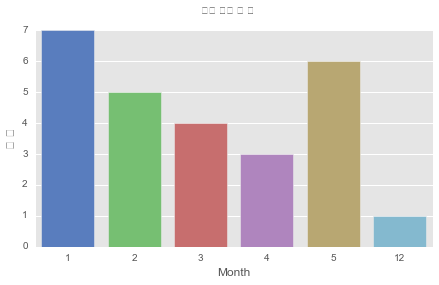

In [18]:
book['Month'] = book['Started Reading'].dt.month
Month_g = sns.factorplot('Month', kind='count', data=book, aspect=1.5, palette = 'muted')
Month_g.fig.suptitle("월별 읽은 책 수")
Month_g.set_ylabels("책 수")
Month_g.fig.subplots_adjust(top=.9)

##### 카테고리별 읽은 책 수 확인

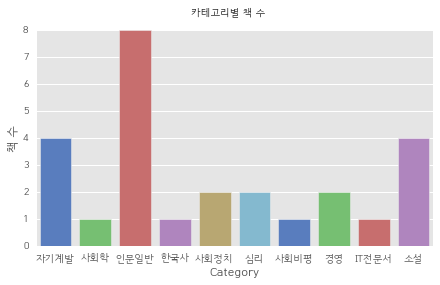

In [21]:
cate_g = sns.factorplot('Category', kind = 'count', data=book,aspect=1.5, palette="muted") # aspect : 축을 늘려줌, palette : 색지정
cate_g.fig.suptitle("카테고리별 책 수")
cate_g.set_ylabels("책 수")
cate_g.fig.subplots_adjust(top=.9)

##### 인문일반을 가장 많이 읽었으므로, 인문일반의 데이터만 뽑기

In [22]:
book_general = book[book.Category == "인문일반"]

In [23]:
book_general

,Title,Subtitle,Author,Translator,Publisher,Publish Date,Format,Pages,ISBN,Status,...,Finished Reading,Reading Period,Borrowed,Have Weekend,Reading Time,Read Reason,Found Route,Route Category,Text,Month
3,"로봇 시대,인간의 일",인공지능 시대를 살아가야 할 이들을 위한 안내서,구본권,NaN,어크로스,2015-12-15 00:00:00,Paperback,342,9788997379767,Read,...,2016-01-14,2,Y,N,0,지인추천,NaN,지인,"요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 ""이렇게 공유해...",1
5,사피엔스,"유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문",유발 하라리,조현욱,김영사,2015-11-24 00:00:00,book,586,8934972726,Read,...,2016-01-23,5,Y,Y,0,지인추천,NaN,지인,아 모르겠다 한번더 읽어봐야 알 거 같다.,1
11,어떻게 읽을 것인가,NaN,고영성,NaN,스마트북스,2015-12-28 00:00:00,book,302,9791185541303,Read,...,2016-02-20,2,Y,Y,0,지인추천,NaN,지인,지인이 추천한 책이다. 독서 허접인 나에게 딱 맞는 책이라 생각한다. 그 맞는 책이...,2
15,시민의교양,NaN,채사장,NaN,웨일북,2016-01-07 00:00:00,eBook,348,9791195677108,Read,...,2016-03-27,6,N,Y,336,검색,서점,오프라인검색,책울 손에 놓지 않기 위해 서점에서 찾다가 발견한 책이다. 일단 저자 이름이 특이해...,3
16,"지적 대화를 위한 넓고 얕은 지식(역사,경제,정치,사회,윤리)",NaN,채사장,NaN,NaN,2015-02-04 00:00:00,eBook,327,9788994120966,Read,...,2016-04-03,6,N,Y,228,검색,시민의교양,표지,시민의 교양을 읽으며 유명하다고 해서 읽은 책이다. 본래는 이 책을 읽고 시민의 교...,3
17,지적 대화를 위한 넓고 얕은 지식: 현실너머 편,NaN,채사장,NaN,NaN,2015-02-04 00:00:00,eBook,338,9788994120997,Read,...,2016-04-09,5,N,Y,293,검색,시민의교양,표지,지대넓얕의 현실 세계 너머 편이다. 1권은 아무래도 귓동냥으로 들은게 있어서 인지 ...,4
20,김대식의 빅퀘스천,NaN,김대식,NaN,NaN,2014-12-03 00:00:00,book,320,9788962620887,Read,...,2016-05-04,2,Y,N,154,지인추천,NaN,지인,철학 같이 생각이 많은 책이 힘들다는 말에 지인이 추천해준 책이다. 이름부터 빅퀘스...,5
25,"천재의 두 얼굴, 사이코패스",NaN,케빈 더튼,NaN,미래의 창,2013-05-20 00:00:00,eBook,287,9788959892235,Read,...,2016-05-31,4,N,Y,201,검색,리디북스,인터넷,또라이들의 시대를 읽은 후 특이한 것에 끌려 검색하다가 찾은 책이다. 이 책은 사이...,5


##### 내가 읽은 인문일반 책들 확인

In [24]:
book_general[['Title', 'Text'] ]

,Title,Text
3,"로봇 시대,인간의 일","요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 ""이렇게 공유해..."
5,사피엔스,아 모르겠다 한번더 읽어봐야 알 거 같다.
11,어떻게 읽을 것인가,지인이 추천한 책이다. 독서 허접인 나에게 딱 맞는 책이라 생각한다. 그 맞는 책이...
15,시민의교양,책울 손에 놓지 않기 위해 서점에서 찾다가 발견한 책이다. 일단 저자 이름이 특이해...
16,"지적 대화를 위한 넓고 얕은 지식(역사,경제,정치,사회,윤리)",시민의 교양을 읽으며 유명하다고 해서 읽은 책이다. 본래는 이 책을 읽고 시민의 교...
17,지적 대화를 위한 넓고 얕은 지식: 현실너머 편,지대넓얕의 현실 세계 너머 편이다. 1권은 아무래도 귓동냥으로 들은게 있어서 인지 ...
20,김대식의 빅퀘스천,철학 같이 생각이 많은 책이 힘들다는 말에 지인이 추천해준 책이다. 이름부터 빅퀘스...
25,"천재의 두 얼굴, 사이코패스",또라이들의 시대를 읽은 후 특이한 것에 끌려 검색하다가 찾은 책이다. 이 책은 사이...


### 위의 책들에 대한 나의 생각 및 관심사 확인
##### - 가지고 있는 텍스트에서 단어 뽑기 위해 list로 변환

In [25]:
general_text = book_general.Text.tolist() # list 변환

##### konlpy의 Twitter() 를 이용한 단어 및 단어당 횟수 뽑기
#####  -관련링크 :  http://konlpy.org/ko/v0.4.3/api/konlpy.tag/

In [41]:
tagger = Twitter()
cv = CountVectorizer(tokenizer=get_word, max_features=50) # 50개의 단어 추출
tdf = cv.fit_transform(general_text) 
words = cv.get_feature_names()
print (words)
    
count_mat = tdf.sum(axis=0) # 열별로 단어별 출현 빈도 합계 구함(axis = 1 , 각 문서별 명사의 사용 개수)
count = np.squeeze(np.asarray(count_mat)) # 대괄호가 하나로 줄어듬. 좀더 데이터 핸들링을 쉽게 하기 위해 리스트 형태로 해줌
print (count)

['감정', '개념', '개입', '경우', '경제', '과학', '관점', '교양', '교육', '국가', '기능', '기억', '노동자', '러닝', '로봇', '마지막', '문제', '미래', '배분', '사이코패스', '사회', '세계', '세금', '손해', '시대', '시민', '어찌', '언급', '엄독', '역사', '윤리', '이득', '이유', '임금', '자본가', '자본주의', '자신', '자유', '잡스', '재독', '재미', '정부', '정의', '정치', '주제', '직업', '진리', '질병', '철학', '현실']
[ 3  6  2  2  9  2  6  3  3  4  2  2  4  2  2  2  2  2  2 13  6  3  7  3  5
  3  1  1  1  2  4  3  2  2  2  2  2  5  1  1  1  2  5  2 10  2  6  2  2  5]


##### dataframe 만드는 과정

In [42]:
word_data = {'word' : words, 'count' : count}

In [43]:
word_df = DataFrame(word_data, columns =['word', 'count'] )

In [44]:
word_df

,word,count
0,감정,3
1,개념,6
2,개입,2
3,경우,2
4,경제,9
5,과학,2
6,관점,6
7,교양,3
8,교육,3
9,국가,4


##### 단어별 빈도수를 나타내기 위한 groupby
##### word 별로 groupby 후 count로 aggregate

In [45]:
group_word = word_df.groupby('word').agg({'count': sum})

In [46]:
group_word = group_word.sort_values(['count'], ascending=[0])

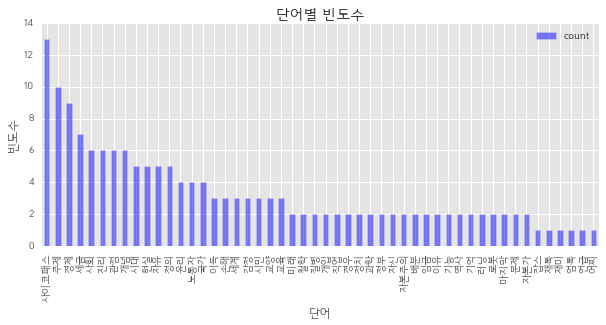

In [47]:
group_word.plot(kind="bar", alpha=0.5, rot=90, figsize=(10, 4), color = "blue")
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.title("단어별 빈도수")
plt.show()

##### wordcloud 나타내기

In [48]:
word_count = list(zip(words, count))

In [49]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('사이코패스', 13),
 ('주제', 10),
 ('경제', 9),
 ('세금', 7),
 ('개념', 6),
 ('관점', 6),
 ('사회', 6),
 ('진리', 6),
 ('시대', 5),
 ('자유', 5),
 ('정의', 5),
 ('현실', 5),
 ('국가', 4),
 ('노동자', 4),
 ('윤리', 4),
 ('감정', 3),
 ('교양', 3),
 ('교육', 3),
 ('세계', 3),
 ('손해', 3),
 ('시민', 3),
 ('이득', 3),
 ('개입', 2),
 ('경우', 2),
 ('과학', 2),
 ('기능', 2),
 ('기억', 2),
 ('러닝', 2),
 ('로봇', 2),
 ('마지막', 2),
 ('문제', 2),
 ('미래', 2),
 ('배분', 2),
 ('역사', 2),
 ('이유', 2),
 ('임금', 2),
 ('자본가', 2),
 ('자본주의', 2),
 ('자신', 2),
 ('정부', 2),
 ('정치', 2),
 ('직업', 2),
 ('질병', 2),
 ('철학', 2),
 ('어찌', 1),
 ('언급', 1),
 ('엄독', 1),
 ('잡스', 1),
 ('재독', 1),
 ('재미', 1)]

In [50]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

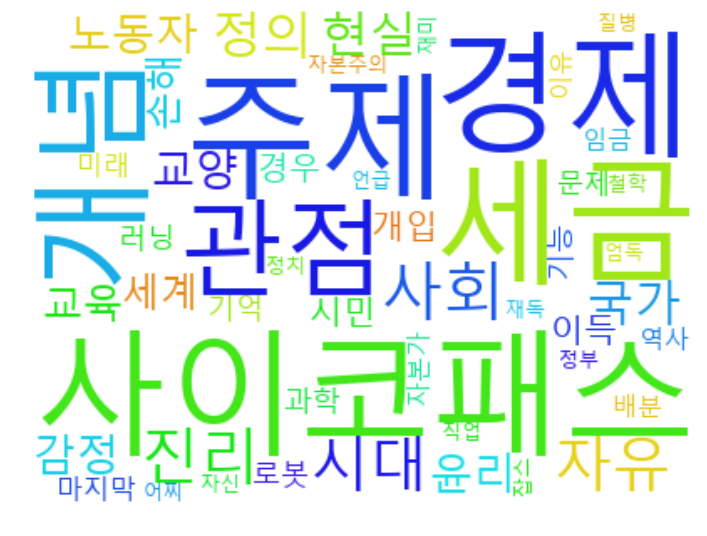

In [51]:
plt.figure(figsize=(12, 9))
plt.imshow(cloud)
plt.axis("off")
plt.show()

###### network를 그리기 위한 상관계수 구하기

In [52]:
word_corr = np.corrcoef(tdf.todense(), rowvar=0) # 상관계수 구하기(rowvar =0 : 컬럼단위 상관계수, 1이면 문서간의 상관계수)
print (word_corr)

[[ 1.         -0.21821789 -0.21821789 ...,  1.         -0.21821789
   0.14285714]
 [-0.21821789  1.          0.77777778 ..., -0.21821789 -0.11111111
   0.31520362]
 [-0.21821789  0.77777778  1.         ..., -0.21821789 -0.33333333
  -0.0727393 ]
 ..., 
 [ 1.         -0.21821789 -0.21821789 ...,  1.         -0.21821789
   0.14285714]
 [-0.21821789 -0.11111111 -0.33333333 ..., -0.21821789  1.          0.50917508]
 [ 0.14285714  0.31520362 -0.0727393  ...,  0.14285714  0.50917508  1.        ]]


###### edge와 weight 구하기

In [54]:
edges = []
for i in range(len(words)): 
    for j in range(i + 1, len(words)): 
        edges.append((words[i], words[j], word_corr[i, j])) # 1이 아닌 및부분의 상관계수 추리기

edges = sorted(edges, key=operator.itemgetter(2), reverse=True) # 상관게수가 높은걸로 정렬
edges = edges[:50]
print (edges)

edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

[('감정', '경우', 1.0), ('감정', '기능', 1.0), ('감정', '사이코패스', 1.0), ('감정', '잡스', 1.0), ('감정', '질병', 1.0), ('개입', '마지막', 1.0), ('개입', '정부', 1.0), ('경우', '사이코패스', 1.0), ('교육', '국가', 1.0), ('교육', '노동자', 1.0), ('교육', '미래', 1.0), ('교육', '배분', 1.0), ('교육', '세금', 1.0), ('교육', '손해', 1.0), ('교육', '이득', 1.0), ('교육', '임금', 1.0), ('교육', '자본가', 1.0), ('교육', '자유', 1.0), ('교육', '재미', 1.0), ('교육', '직업', 1.0), ('국가', '세금', 1.0), ('국가', '손해', 1.0), ('국가', '이득', 1.0), ('기능', '사이코패스', 1.0), ('노동자', '세금', 1.0), ('노동자', '손해', 1.0), ('노동자', '이득', 1.0), ('마지막', '정부', 1.0), ('미래', '세금', 1.0), ('미래', '손해', 1.0), ('미래', '이득', 1.0), ('배분', '세금', 1.0), ('배분', '손해', 1.0), ('배분', '이득', 1.0), ('사이코패스', '잡스', 1.0), ('사이코패스', '질병', 1.0), ('세금', '손해', 1.0), ('세금', '이득', 1.0), ('세금', '임금', 1.0), ('세금', '자본가', 1.0), ('세금', '자유', 1.0), ('세금', '재미', 1.0), ('세금', '직업', 1.0), ('손해', '이득', 1.0), ('손해', '임금', 1.0), ('손해', '자본가', 1.0), ('손해', '자유', 1.0), ('손해', '재미', 1.0), ('손해', '직업', 1.0), ('이득', '임금', 1.0)]


###### network 그래프 

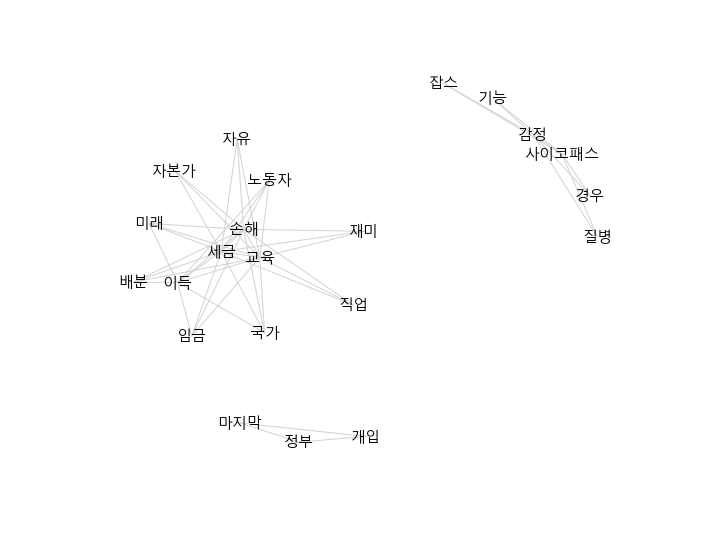

In [56]:
G = networkx.Graph() # 그래프 생성

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight) # 노드간의 연결선을 추가(단어간의 관계)
    edge_set.add((word1, word2))
# spring_layout : edge를 스프링처럼 사용하여 단어간의 자성이 있는 것처럼 밀어내거나 당기는 물리학 시뮬레이션으로 위치를 나타냄
# 서로 연결이 잘 되있을수록 가깝게 연결되어 나옴
# 항상 랜덤이다
# iterations 가 커질수록 안정적으로 나온다.
position = networkx.spring_layout(G, iterations=30) 
plt.figure(figsize=(12, 9)) # 그래프 크기
networkx.draw_networkx_nodes(G, position, node_size=0) # 노드추가
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray') # edge 추가
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic') # 노드의 단어
plt.axis('off')
plt.show()

###### network를 통해 봤을 때 사이코패스의 경우 내가 생각하는 생각은 기능,감정,질병 적인 면에서 설명하는 경우가 많고
###### 세금의 경우는 '시민의교양'의 영향이 컸는지 책에 대한 줄거리에 나올만한 얘기를 하는 경우가 많은 것 같다. 